<a href="https://colab.research.google.com/github/lokeshpuma/Deep_Learning/blob/main/8_GPU_benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [7]:
(X_train,y_train ),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [13]:
X_train.shape , X_test.shape ,y_train.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
def plot_sample(index):
  plt.figure(figsize= (10,1))
  plt.imshow(X_train[index])


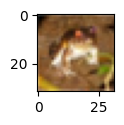

In [22]:
plot_sample(0)

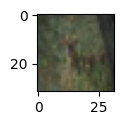

In [23]:
plot_sample(10)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
y_train[3]

array([4], dtype=uint8)

In [28]:
classes[y_train[5][0]]

'automobile'

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [42]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [43]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train_categorical,epochs=50)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.3068 - loss: 1.9270
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 79ms/step - accuracy: 0.4166 - loss: 1.6478
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 74ms/step - accuracy: 0.4518 - loss: 1.5587
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.4779 - loss: 1.4858
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.4973 - loss: 1.4337
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.5056 - loss: 1.3978
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5245 - loss: 1.3503
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5418 - loss: 1.3099
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.5512 - loss: 1.2726
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5631 - loss: 1.2492
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 74ms/step - accuracy: 0.5708 - loss: 1.22

In [44]:
classes[y_test[0][0]]

'cat'

In [45]:
classes[np.argmax(model.predict(X_test_scaled)[0])]
#

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


'cat'

In [46]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5746 - loss: 1.5615


[1.5534427165985107, 0.5703999996185303]

In [47]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [50]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.3020 - loss: 1.9307


In [51]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 81ms/step - accuracy: 0.3063 - loss: 1.9285
2min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [52]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.3036 - loss: 1.9315
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.4179 - loss: 1.6468
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4540 - loss: 1.5558
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4710 - loss: 1.4986
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4928 - loss: 1.4423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 87ms/step - accuracy: 0.5062 - loss: 1.4013
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 83ms/step - accuracy: 0.5228 - loss: 1.3547
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5412 - loss: 1.3137
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 81ms/step - accuracy: 0.5454 - loss: 1.2885
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.5614 - loss: 1.2482
22min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.3037 - loss: 1.9348
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.4207 - loss: 1.6397
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.4529 - loss: 1.5473
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.4759 - loss: 1.4920
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 84ms/step - accuracy: 0.4987 - loss: 1.4319
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 81ms/step - accuracy: 0.5135 - loss: 1.3877
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - accuracy: 0.5183 - loss: 1.3628
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.5348 - loss: 1.3180
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 87ms/step - accuracy: 0.5482 - loss: 1.2842
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.5624 - loss: 1.2490
23min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
